### Global wet bulb temperature vs web bult temperature
Global wet bult temperature is calculated by Andy reference to: https://github.com/QINQINKONG/PyWBGT/tree/v1.0.0

#### 1 Climatology
 - 1.1 Mean
 - 1.2 Maximum
#### 2 Trend: TWB/GWBT increase over 1980-2020 (linear regression)  
 - 2.1) Mean increase over 40 years
 - 2.2) Maximum increase  over 40 year
#### 3 Trend: number of days exceed certain threshold over 1980-2020 using linear regression
 - 3.1) 0.995*Maximum (K) threshold
 - 3.2) 0.99*Maximum (K) threshold
 

In [129]:
import os.path
import numpy as np
import xarray as xr
import datetime

import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

In [130]:
def plot_ds(ds, var_s):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(ds.lon, ds.lat, ds[var_s][0], transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    plt.colorbar(mm, orientation='horizontal', pad=0.03)    
    
    plt.title(var_s, fontweight="bold",fontsize=14)
    plt.show()

In [131]:
def plot_cartopy_2d(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap, extend='both',
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=1)
    
    plt.colorbar(mm, orientation='horizontal', pad=0.03, extend='both')    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold",fontsize=14)
    plt.show()
    
def plot_cartopy_2d_overlay(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    '''
    overlay terrain on top of plot_cartopy_2d
    '''
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap, extend='both',
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    # terrain overlay
    flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
    with xr.open_dataset(flnm) as ds:
        hgt = ds.HGT[0]
    ax.contour (lon_2d, lat_2d, hgt, vmin = 500, vmax=3500, levels = np.linspace(0, 4000, 5),
               linewidths=0.5, colors='black', linestyles='dashed')     
    
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    # mask ocean 
    ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=1)
    plt.colorbar(mm, orientation='horizontal', pad=0.03, extend='both')    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold", fontsize=14)
    plt.show()
    

In [132]:
dir_o = '/glade/campaign/mmm/c3we/mingge/DOD/'
var_s = ['GWBT', 'TWB']
n_var = len(var_s)

# Appending and add String to list of string
dir_i = [dir_o + x + '_DAILY/'  for x in var_s ]
print(dir_i)

year_s = 1980
year_e = 2020

['/glade/campaign/mmm/c3we/mingge/DOD/GWBT_DAILY/', '/glade/campaign/mmm/c3we/mingge/DOD/TWB_DAILY/']


- 1.0) Compute annual data from daily data

In [133]:
is_mean = False  # True for Maximum

year_s = 1980
year_e = 2020
 
mon_e = 12

n_year = year_e - year_s + 1

is_first = True
for nv in range(n_var):
    if is_mean:
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:
        for year in range(year_s, year_e + 1):
            for month in range(1, mon_e + 1):
                if is_mean:
                    flnm = dir_o + var_s[nv] + '_DAILY/' + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_daily.nc'
                else:
                    flnm = dir_o + var_s[nv] + '_DAILY/' + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv],flnm)
                    data_d = ds[var_s[nv]]
            
                # concatenate/append numpy data  
                if month == 1:
                    data_y = data_d.copy()
                    if is_first == True:
                        data_3d = np.zeros((n_year, data_y.shape[1], data_y.shape[2]))
                        is_first = False                     
                else:
                    data_y = np.append(data_y, data_d, axis=0)
                
                if month == mon_e:
                    if is_mean:
                        data_3d[year-year_s] = np.mean(data_y, axis=0)
                    else:
                        data_3d[year-year_s] = np.amax(data_y, axis=0)
                        
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc exist


- 1.1 Mean

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean.nc


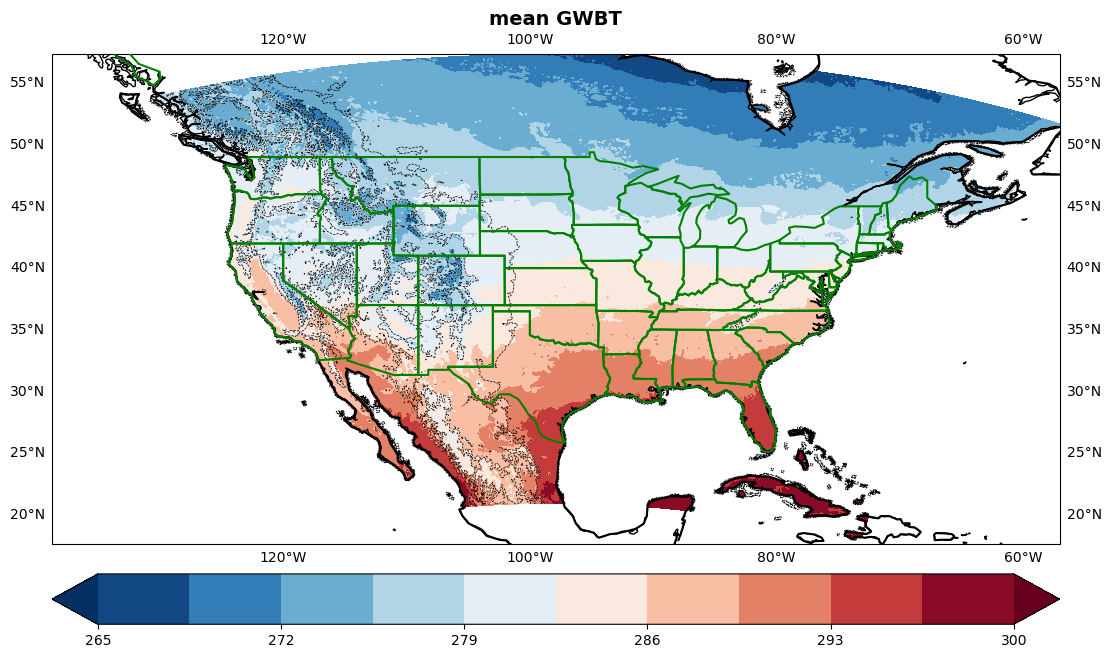

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean.nc


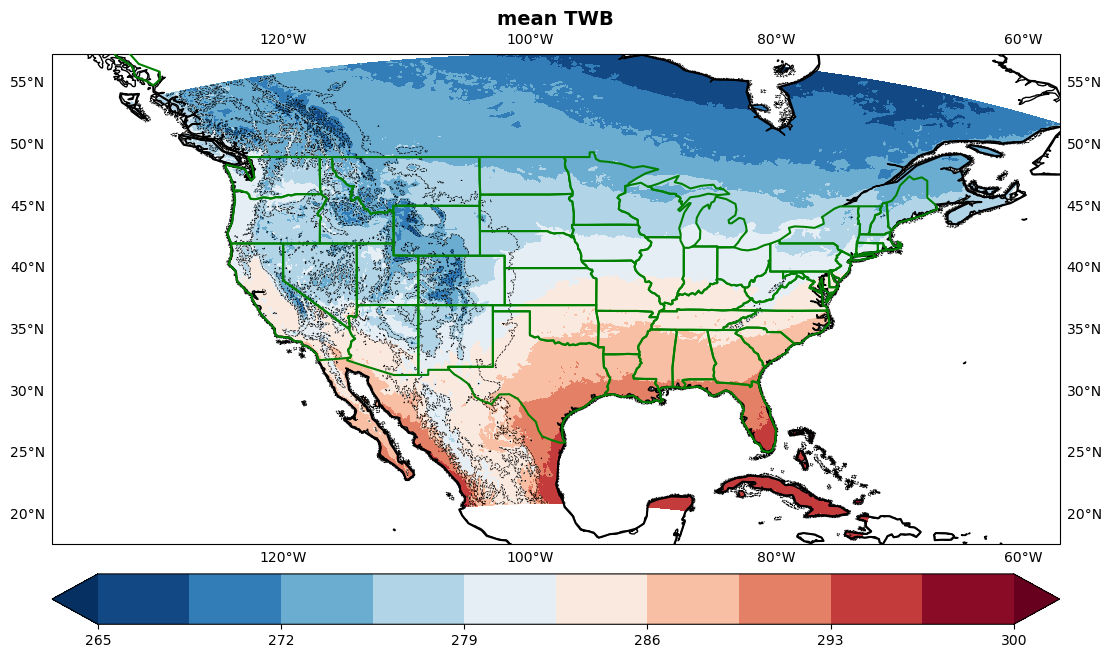

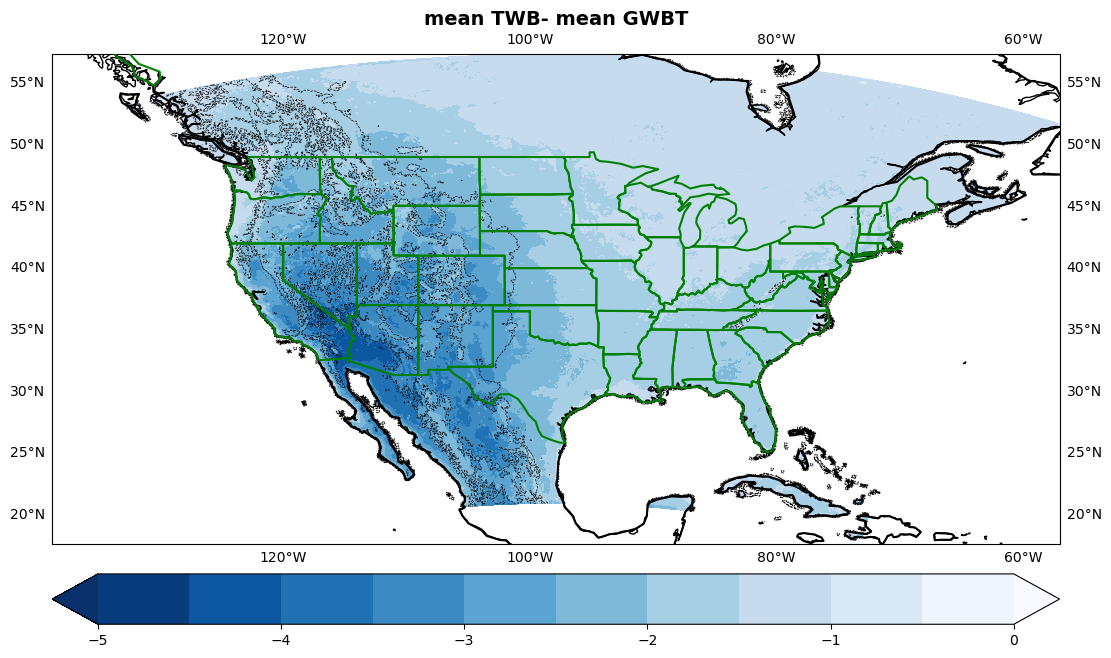

In [139]:
is_mean = True
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    print(flnm)

    with xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        da = ds[var_s[nv]].mean(dim='time')
    
    plot_cartopy_2d_overlay (ds.lat, ds.lon, da, 'mean '+ var_s[nv], 265, 300, 11, 'RdBu_r')
    
    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d, 'mean ' + var_s[nv] + '- mean ' + var_s[0], -5, 0, 11, 'Blues_r'); 
    

- 1.2) Maximum

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc


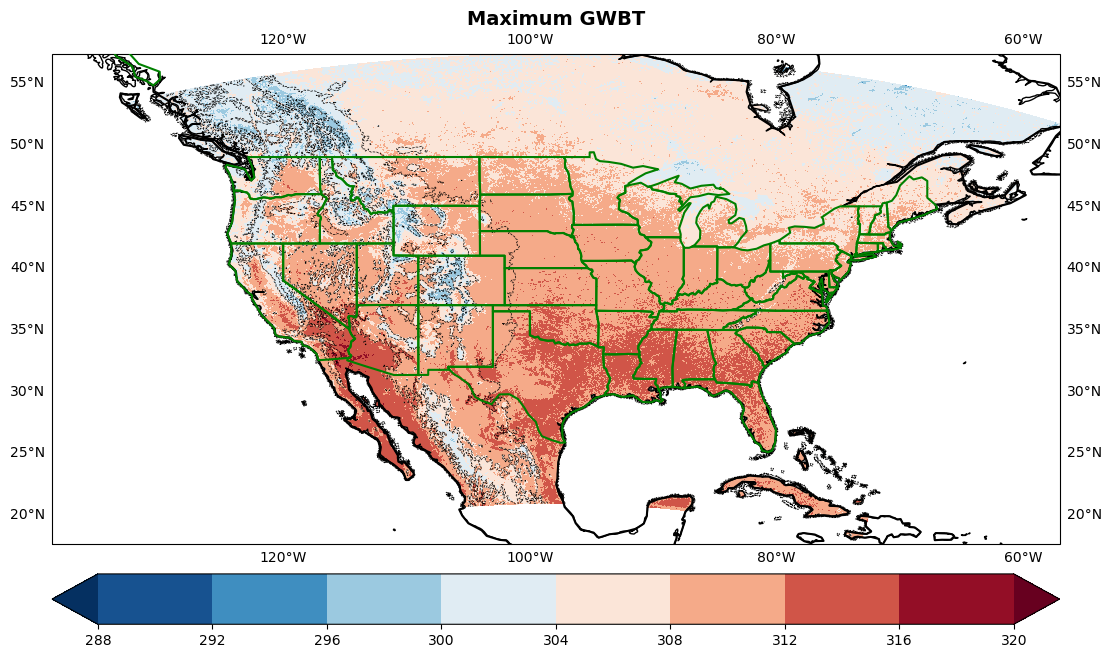

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc


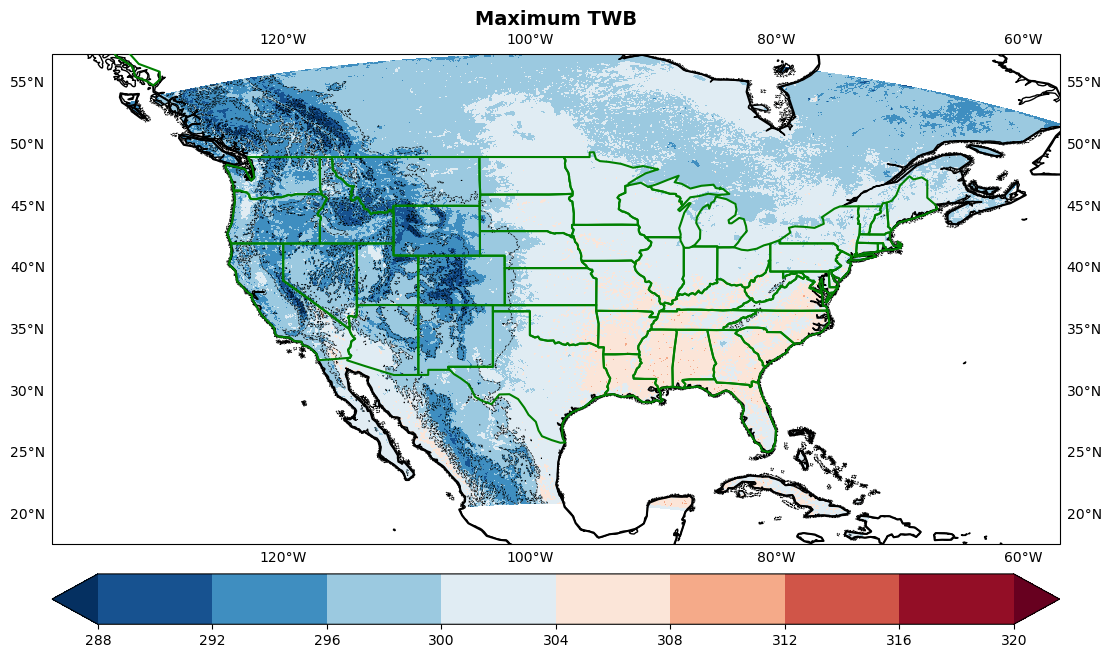

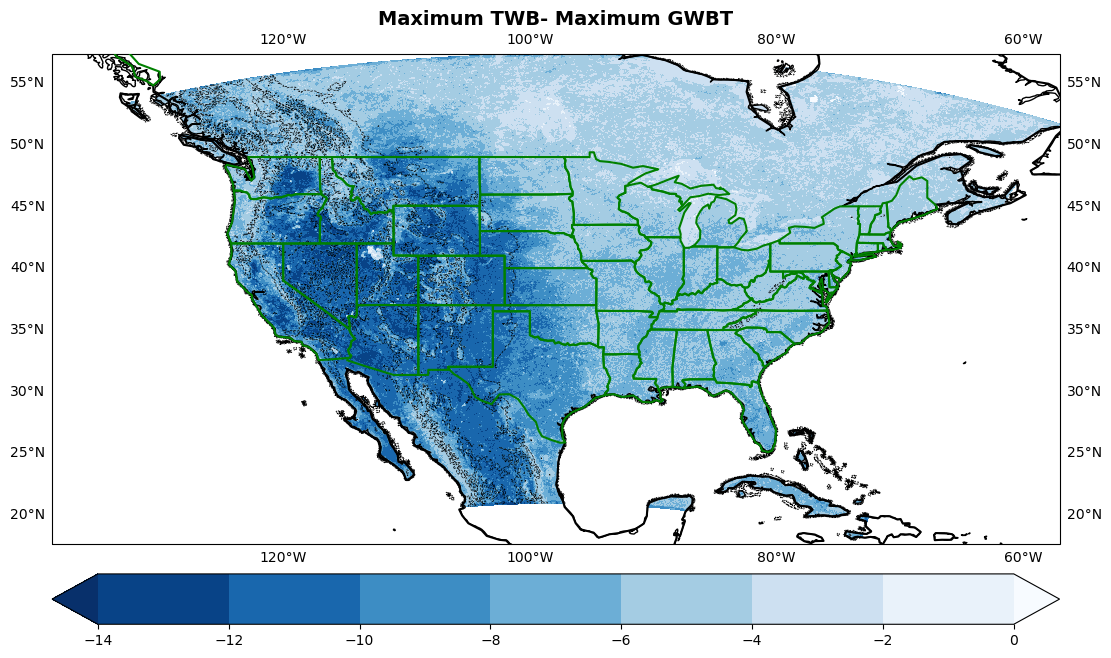

In [140]:
is_mean = False
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    print(flnm)

    with xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        da = ds[var_s[nv]].max(dim='time')
    
    plot_cartopy_2d_overlay (ds.lat, ds.lon, da, 'Maximum ' + var_s[nv], 288, 320, 9, 'RdBu_r') 

    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d, 'Maximum ' + var_s[nv] + '- Maximum ' + var_s[0], -14, 0, 8, 'Blues_r'); 
    

##### 2 Trend calculation

In [141]:
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
        with xr.open_dataset(flnm_o) as ds:
            print(var_s[nv],flnm_o)
            da = ds[var_s[nv]]
    else:
        with xr.open_dataset(flnm) as ds:
            print(var_s[nv],flnm)
            data_3d = ds[var_s[nv]]
            n_year = data_3d.shape[0]
            n_lat = data_3d.shape[1]
            n_lon = data_3d.shape[2]
        
        slope_2d = np.zeros((n_lat, n_lon))  
        for ni in range(n_lat):
            print(ni)
            for nj in range(n_lon):
                slope_2d[ni, nj] = np.polyfit(range(data_3d.shape[0]), data_3d[:,ni, nj],1)[0]
            
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["y", "x"])
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["yc", "xc"])
            
        ds = da.to_dataset(name=var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc exist
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc exist
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc


- 2.1 Mean increase over 40 years

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean_slope.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean_slope.nc


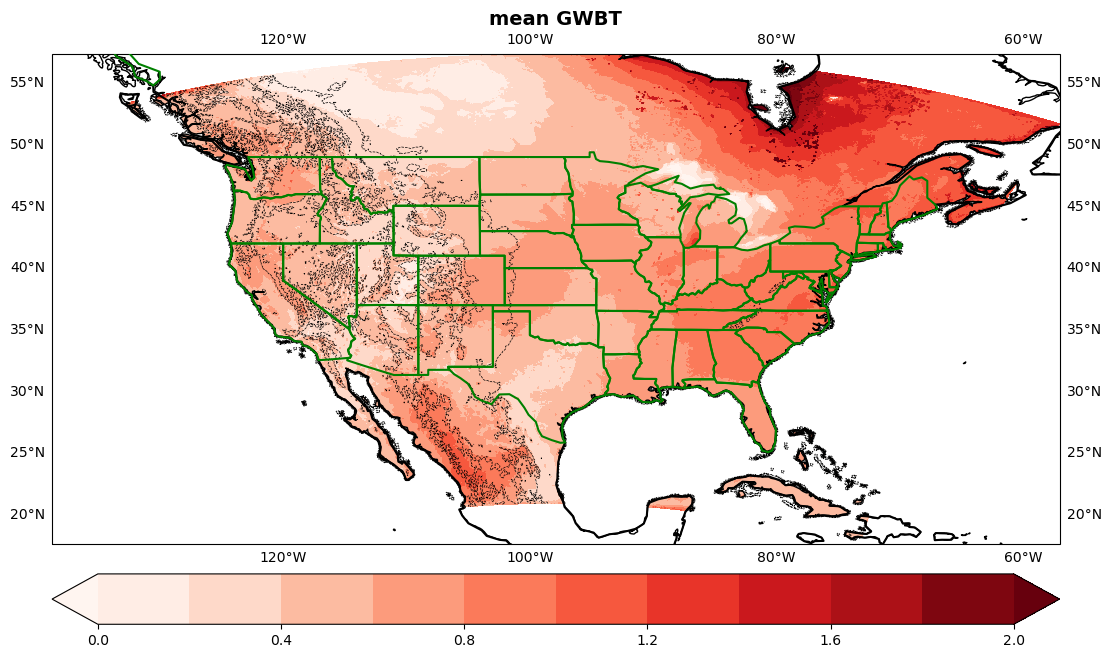

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean_slope.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean_slope.nc


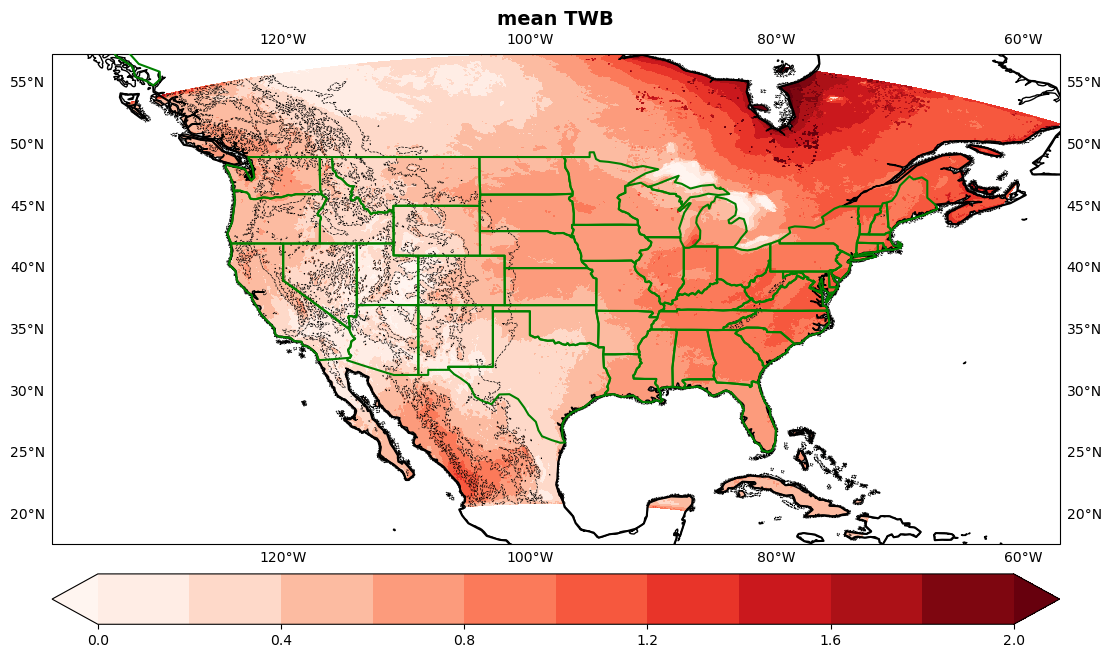

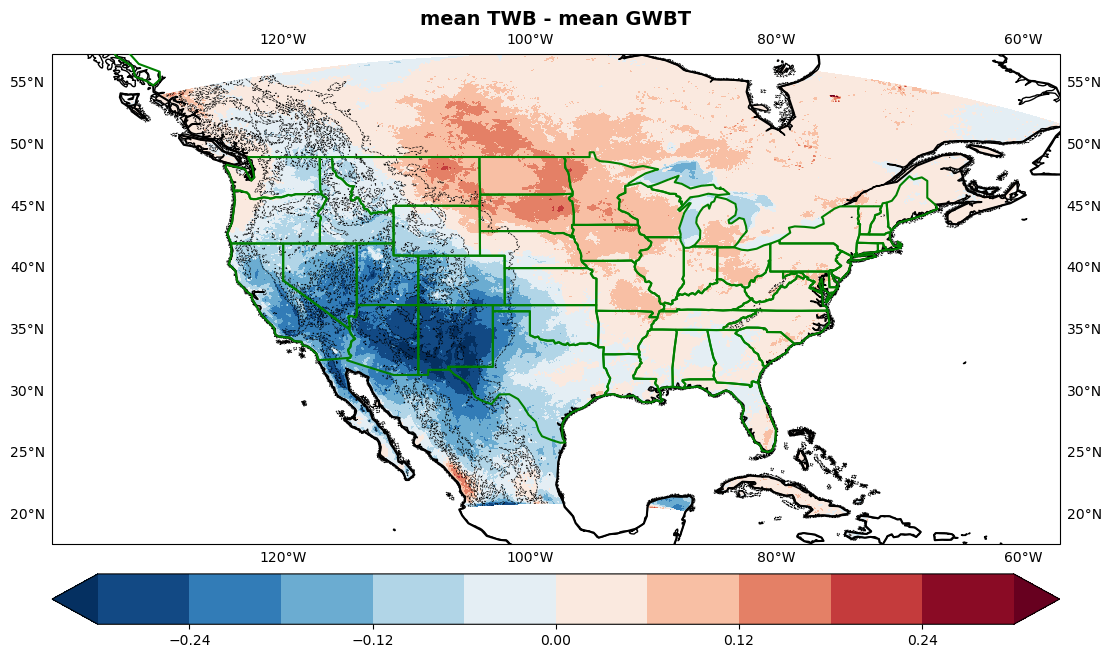

In [142]:
is_mean  = True
for nv in range(n_var):
    if is_mean:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
    print(flnm_i)
    with xr.open_dataset(flnm_i) as ds:
            print(var_s[nv],flnm_i)
            da = ds[var_s[nv]]
             
    #if var_s[nv] == 'GWBT':
    plot_cartopy_2d_overlay (ds.lat, ds.lon, ds[var_s[nv]]*(n_year-1), 'mean ' + var_s[nv], 0, 2, 11, 'Reds') 
    if nv == 0:
        data_0 = da
    else: 
        data_2d = da.values - data_0.values
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d*(n_year-1), 'mean ' + var_s[nv] + ' - mean ' + var_s[0], -0.3, 0.3, 11, 'RdBu_r') 


- 2.2) Maximum increase over 40 year

GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc


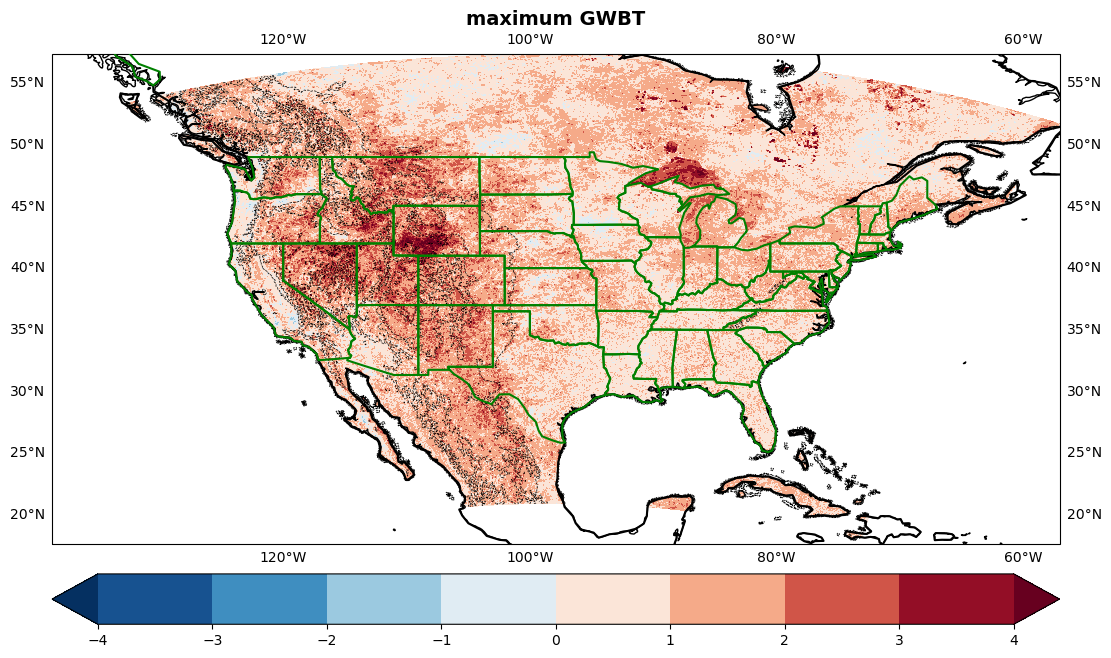

TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc


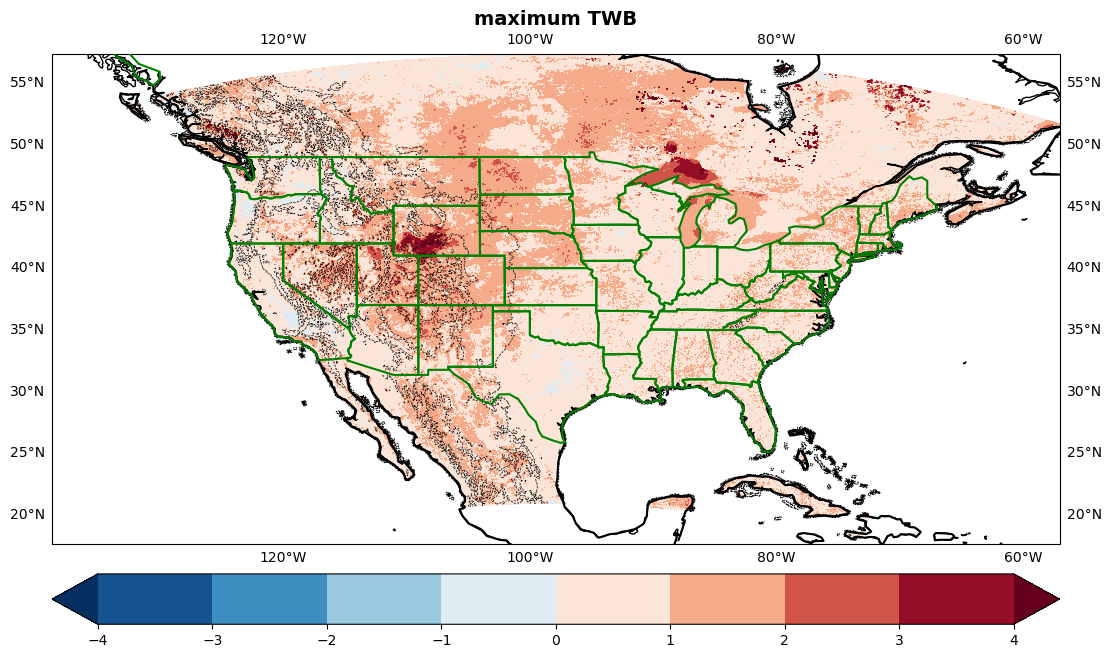

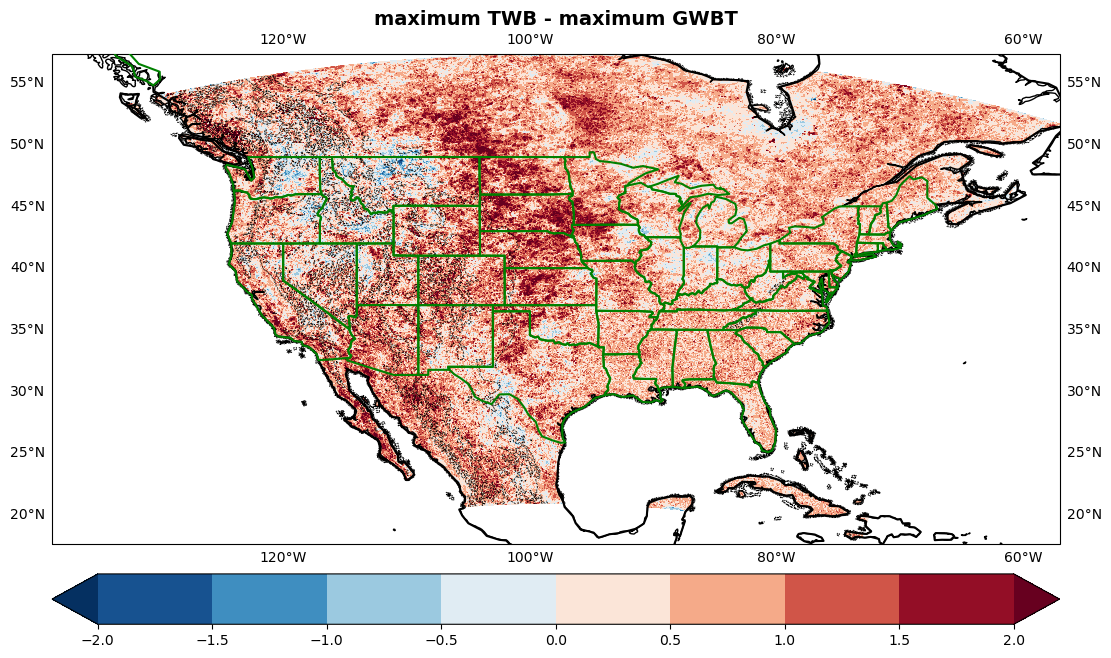

In [143]:
is_mean = False
for nv in range(n_var):
    if is_mean:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
   
        with xr.open_dataset(flnm_i) as ds:
            print(var_s[nv],flnm_i)
            da = ds[var_s[nv]]
             
    plot_cartopy_2d_overlay (ds.lat, ds.lon, ds[var_s[nv]]*(n_year-1), 'maximum ' + var_s[nv], -4, 4, 9, 'RdBu_r') 
    if nv == 0:
        data_0 = da
    else: 
        data_2d = da.values - data_0.values
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d*(n_year-1), 'maximum ' + var_s[nv] + ' - maximum ' + var_s[0], -2, 2, 9, 'RdBu_r') 



#### 3)  Trend of number of days exceed certain threshold
- 3.1)  0.995*Maximum (K) threshold

In [120]:
# calculate annual number of days TWB > 0.995*TWBmax
mon_e = 12

for nv in range(n_var):
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayEx995.nc'
    flnm_max = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'

    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:   
        with xr.open_dataset(flnm_max) as ds:
            print(var_s[nv],flnm_max)
            # use 995% maximum as threshold
            da_threshold = ds[var_s[nv]].max(dim='time')*.995
         
            if nv == 0:
                n_i = da_threshold.shape[0]
                n_j = da_threshold.shape[1]
                data_3d = np.zeros((n_year, n_i, n_j))
                print(da_threshold.shape)
        
        dir_i = dir_o + var_s[nv] + '_DAILY/'
    
        for year in range(year_s, year_e + 1):
            for month in range(1, mon_e + 1):
                flnm = dir_i + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
            
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv], flnm)
                    data_d = ds[var_s[nv]]
            
                    # concatenate/append numpy data  
                    if month == 1:
                        data_y = data_d.copy()               
                    else:
                        data_y = np.append(data_y, data_d, axis=0)
                
                    if month == mon_e:
                        data_y = data_y - da_threshold.values
                        data_3d[year-year_s] = np.sum(data_y >0,  axis=0)
                        # find the index of maximum value
                        #i,j = np.unravel_index(n_y.argmax(), n_y.shape)
                        #print('ny_ij=', n_y[i,j] )
                        #print('max ', n_y.max())
                        #print('i,j=',i,j)
                        #print('threshold: ', da_threshold[i,j].values)
                        #print(data_y[:, i, j])
    
                        #cp = plt.contourf(ds.lon, ds.lat, n_y, vmin = 0, vmax=10, levels =np.linspace(0, 10, 11),  cmap = 'Blues')
                        #plt.colorbar(cp)                      
                    
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = 'n_' + var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx995.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx995.nc exist


In [121]:
# Calculate annual trend
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayEx995.nc'
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayEx995_slope.nc'
    var_ss = 'n_' + var_s[nv]
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
        with xr.open_dataset(flnm_o) as ds:
            print(var_ss,flnm_o)
            da = ds[var_ss]
    else:
        with xr.open_dataset(flnm) as ds:
            print(var_ss,flnm)
            data_3d = ds[var_ss]
            n_year = data_3d.shape[0]
            n_lat = data_3d.shape[1]
            n_lon = data_3d.shape[2]
        
        slope_2d = np.zeros((n_lat, n_lon))  
        for ni in range(n_lat):
        #for ni in range(10):    
            print(ni)
            for nj in range(n_lon):
                slope_2d[ni, nj] = np.polyfit(range(data_3d.shape[0]), data_3d[:,ni, nj],1)[0]
            
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["y", "x"])
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["yc", "xc"])
            
        ds = da.to_dataset(name=var_ss)         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx995_slope.nc exist
n_GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx995_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx995_slope.nc exist
n_TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx995_slope.nc


/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx995_slope.nc
n_GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx995_slope.nc


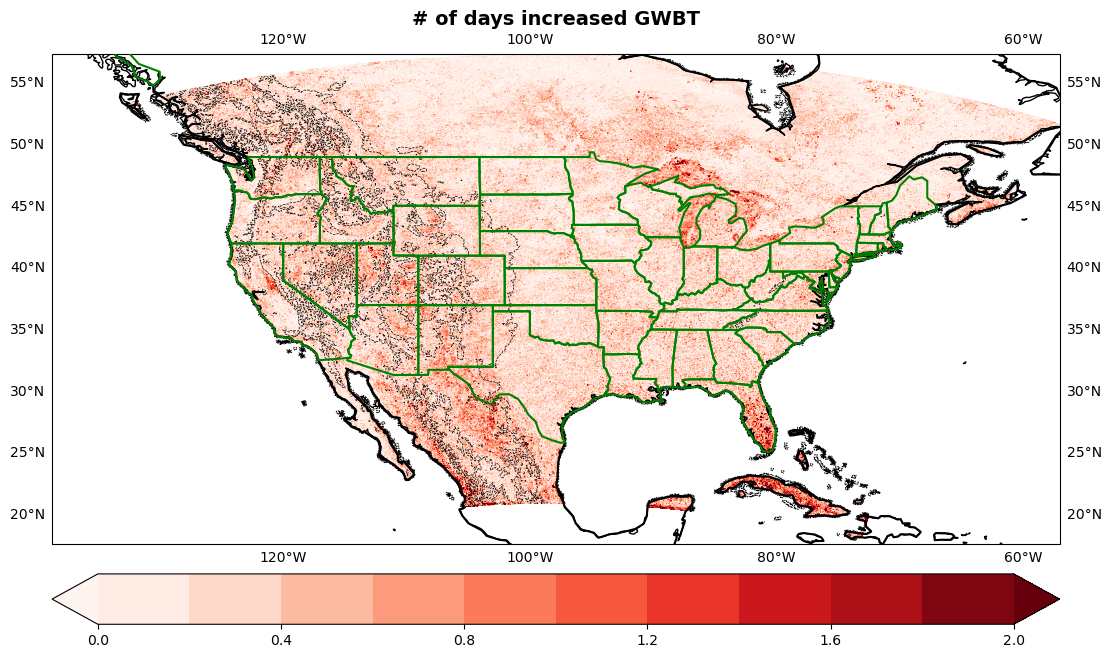

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx995_slope.nc
n_TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx995_slope.nc


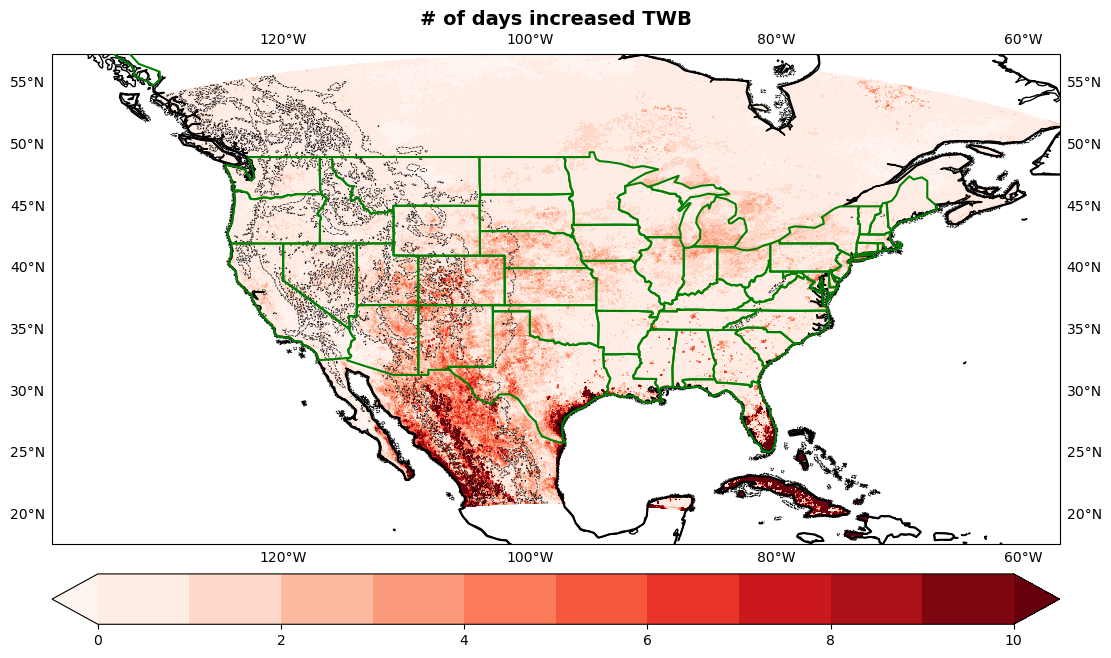

In [124]:
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayEx995_slope.nc'
    print(flnm)
    var_ss = 'n_' + var_s[nv]
    
    with xr.open_dataset(flnm) as ds:
        print(var_ss,flnm)
        da = ds[var_ss] 
    
    if var_s[nv] == 'GWBT':
        plot_cartopy_2d_overlay (ds.lat, ds.lon, da*(n_year-1), '# of days increased '+ var_s[nv], 0, 2, 11, 'Reds')
    else:
        plot_cartopy_2d_overlay (ds.lat, ds.lon, da*(n_year-1), '# of days increased '+ var_s[nv], 0, 10, 11, 'Reds')
        
    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 


- 3.2) 0.99*Maximum (K) threshold

In [125]:
for nv in range(n_var):
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayEx99.nc'
    flnm_max = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'

    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:   
        with xr.open_dataset(flnm_max) as ds:
            print(var_s[nv],flnm_max)
            # use 99% maximum as threshold
            da_threshold = ds[var_s[nv]].max(dim='time')*.99
         
            if nv == 0:
                n_i = da_threshold.shape[0]
                n_j = da_threshold.shape[1]
                data_3d = np.zeros((n_year, n_i, n_j))
                print(da_threshold.shape)
        
        dir_i = dir_o + var_s[nv] + '_DAILY/'
        for year in range(year_s, year_e + 1):
            for month in range(1, mon_e + 1):
                flnm = dir_i + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
            
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv], flnm)
                    data_d = ds[var_s[nv]]
            
                    # concatenate/append numpy data  
                    if month == 1:
                        data_y = data_d.copy()               
                    else:
                        data_y = np.append(data_y, data_d, axis=0)
                
                    if month == mon_e:
                        data_y = data_y - da_threshold.values
                        data_3d[year-year_s] = np.sum(data_y >0,  axis=0)
                        
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = 'n_' + var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx99.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx99.nc exist


- Trend - increase of number of days exceed .99*maximum TWB or GWBT over (1980-2020) using linear regression

In [126]:
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayEx99.nc'
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayEx99_slope.nc'
    var_ss = 'n_' + var_s[nv]
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
        with xr.open_dataset(flnm_o) as ds:
            print(var_ss,flnm_o)
            da = ds[var_ss]
    else:
        with xr.open_dataset(flnm) as ds:
            print(var_ss,flnm)
            data_3d = ds[var_ss]
            n_year = data_3d.shape[0]
            n_lat = data_3d.shape[1]
            n_lon = data_3d.shape[2]
        
        slope_2d = np.zeros((n_lat, n_lon))  
        for ni in range(n_lat):
        #for ni in range(10):    
            print(ni)
            for nj in range(n_lon):
                slope_2d[ni, nj] = np.polyfit(range(data_3d.shape[0]), data_3d[:,ni, nj],1)[0]
            
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["y", "x"])
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["yc", "xc"])
            
        ds = da.to_dataset(name=var_ss)         
        ds.to_netcdf(flnm_o)
        print(flnm_o)     

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx99_slope.nc exist
n_GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx99_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx99_slope.nc exist
n_TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx99_slope.nc


/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx99_slope.nc
n_GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayEx99_slope.nc


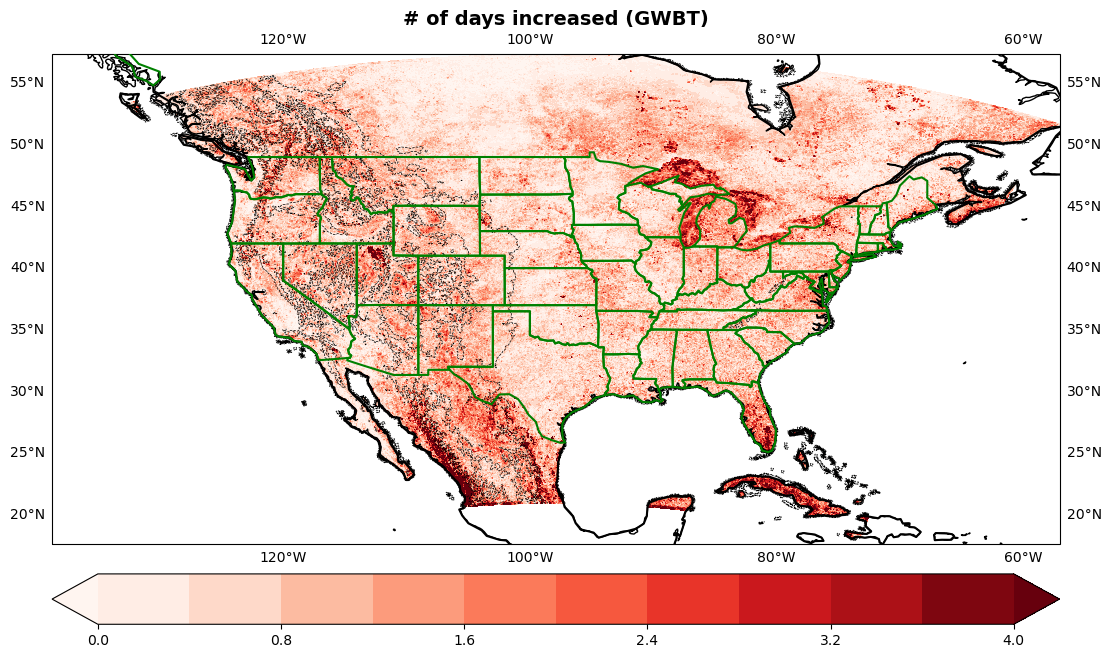

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx99_slope.nc
n_TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayEx99_slope.nc


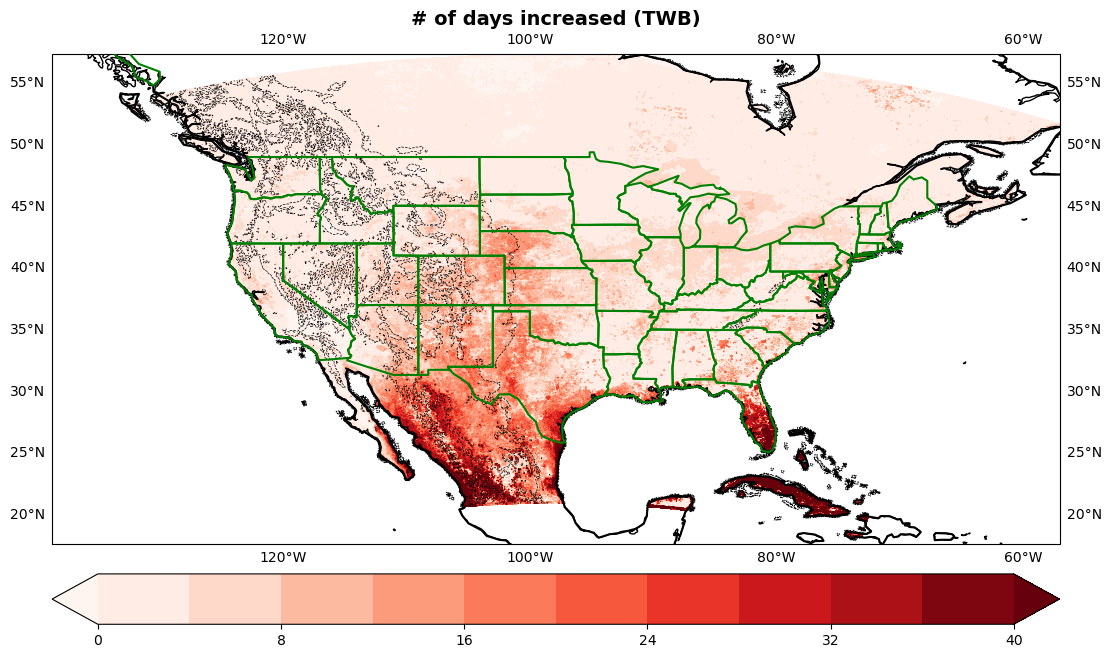

In [127]:
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayEx99_slope.nc'
    print(flnm)
    var_ss = 'n_' + var_s[nv]
    
    with xr.open_dataset(flnm) as ds:
        print(var_ss,flnm)
        da = ds[var_ss] 
    
    if var_s[nv] == 'GWBT':
        plot_cartopy_2d_overlay (ds.lat, ds.lon, da*(n_year-1), '# of days increased ('+ var_s[nv] + ')', 0, 4, 11, 'Reds')
    else:
        plot_cartopy_2d_overlay (ds.lat, ds.lon, da*(n_year-1), '# of days increased ('+ var_s[nv]+ ')', 0, 40, 11, 'Reds')
        
    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 